In [26]:
import cv2
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt

In [27]:
# Specify the path to the dataset folder
dataset_path = '/home/jovyan/ML_PROJECT/DATA/dataset_folder/GTSRB/Final_Training/Images'


In [28]:
# Change the working directory
os.chdir(dataset_path)

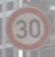

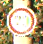

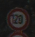

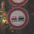

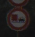

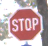

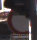

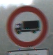

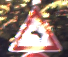

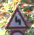

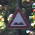

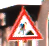

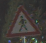

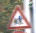

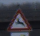

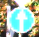

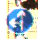

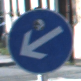

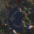

In [29]:
from PIL import Image
import os

# Specify the path to the directory
directory_path = '/home/jovyan/ML_PROJECT/DATA/dataset_folder/GTSRB/Final_Training/Images'

# Iterate over the folders
for i in range(43):
    folder_name = f"{i:05d}"  # Format the folder name with leading zeros
    
    folder_path = os.path.join(directory_path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    
    # Get a list of image files in the folder
    image_files = os.listdir(folder_path)
    image_files.sort()  # Sort the list for consistent order
    
    # Open the first and second image in the folder
    if len(image_files) >= 2:
        image1_path = os.path.join(folder_path, image_files[0])
        image2_path = os.path.join(folder_path, image_files[1])
        
        image1 = Image.open(image1_path)
        image2 = Image.open(image2_path)
        display.display(image2)
        
        # Display the images or perform other operations
        # For example, you can use `image1.show()` to display the image in an external viewer
        '''
        # Print the paths of the opened images
        print("First image path:", image1_path)
        print("Second image path:", image2_path)
        print("---")
        '''

In [30]:
# Specify the path to the folder
'''
folder_path = '/home/jovyan/ML_PROJECT/DATA/dataset_folder/GTSRB/Final_Training/Images/00000/'

# Iterate over all the image files in the folder
for filename in os.listdir(folder_path):
    # Construct the full path to the image
    image_path = os.path.join(folder_path, filename)
    
    # Open and display the image
    image = Image.open(image_path)
    display.display(image)
    '''

"\nfolder_path = '/home/jovyan/ML_PROJECT/DATA/dataset_folder/GTSRB/Final_Training/Images/00000/'\n\n# Iterate over all the image files in the folder\nfor filename in os.listdir(folder_path):\n    # Construct the full path to the image\n    image_path = os.path.join(folder_path, filename)\n    \n    # Open and display the image\n    image = Image.open(image_path)\n    display.display(image)\n    "

In [31]:



'''
# Specify the path to the image
image_path = '/home/jovyan/ML_PROJECT/DATA/dataset_folder/GTSRB/Final_Training/Images/00000/00000_00000.ppm'

# Open and display the image
image = Image.open(image_path)
display.display(image)
'''


"\n# Specify the path to the image\nimage_path = '/home/jovyan/ML_PROJECT/DATA/dataset_folder/GTSRB/Final_Training/Images/00000/00000_00000.ppm'\n\n# Open and display the image\nimage = Image.open(image_path)\ndisplay.display(image)\n"

In [32]:
# Initialize the ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [33]:
def extract_hog_features(image):
    image_resized = cv2.resize(image, (64, 64))  # Resize image to a compatible size
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale

    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(image_gray)
    return hog_features.flatten()

In [34]:
def process_images(image_paths):
    hog_features = []
    
    # Display the first image in each folder
    for i, image_path in enumerate(image_paths):
        if i == 0:
            image = Image.open(image_path)
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        
        image = load_img(image_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        features = resnet_model.predict(np.expand_dims(image, axis=0))
        features = features.reshape(-1)
        hog_features.append(extract_hog_features(image))
    
    return hog_features

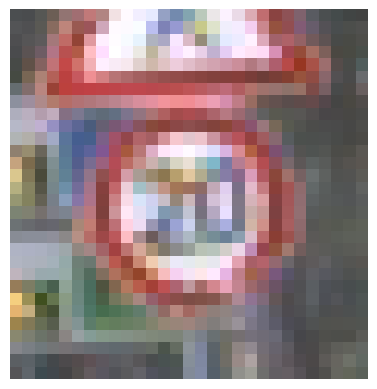

1/1 [==============================] - 1s 799ms/step


error: OpenCV(4.7.0) /io/opencv/modules/objdetect/src/hog.cpp:244: error: (-215:Assertion failed) img.type() == CV_8U || img.type() == CV_8UC3 in function 'computeGradient'


In [35]:
# Specify the path to the directory
directory_path = '/home/jovyan/ML_PROJECT/DATA/dataset_folder/GTSRB/Final_Training/Images'

# Iterate over the folders
for i in range(43):
    folder_name = f"{i:05d}"  # Format the folder name with leading zeros
    
    folder_path = os.path.join(directory_path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    
    # Get a list of image files in the folder
    image_files = os.listdir(folder_path)
    image_files.sort()  # Sort the list for consistent order
    
    # Construct the list of image paths
    image_paths = [os.path.join(folder_path, image_file) for image_file in image_files]
    
    # Call the process_images function with the image paths
    hog_features = process_images(image_paths)
    
    # Convert hog_features to a NumPy array
    hog_features_array = np.array(hog_features)
    
    # Save the NumPy array to a file
    output_file_name = f"{folder_name}_hog_features.npy"
    output_file_path = os.path.join(directory_path, output_file_name)
    np.save(output_file_path, hog_features_array)
    
    # Print the path of the saved file
    print("Saved HOG features:", output_file_path)
    print("---")

In [ ]:

# Convert hog_features to a NumPy array
hog_features_array = np.array(hog_features)

# Save the NumPy array to a file
np.save('hog_features.npy', hog_features_array)


In [ ]:
# Save the NumPy array to a file
np.save('hog_features.npy', hog_features_array)
